# Hoja de Trabajo 5


Michelle Mejía, Silvia Illescas y Emilio Reyes

1. Elabore un modelo de regresión usando bayes ingenuo (naive bayes), el conjunto de
entrenamiento y la variable respuesta SalesPrice. Prediga con el modelo y explique los
resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los
mismos de las hojas anteriores para que los modelos sean comparables.

2. Analice los resultados del modelo de regresión usando bayes ingenuo. ¿Qué tan bien le fue
prediciendo? Utilice las métricas correctas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['SalePrice']

# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RMSE: 53380.67
R² Score: 0.63


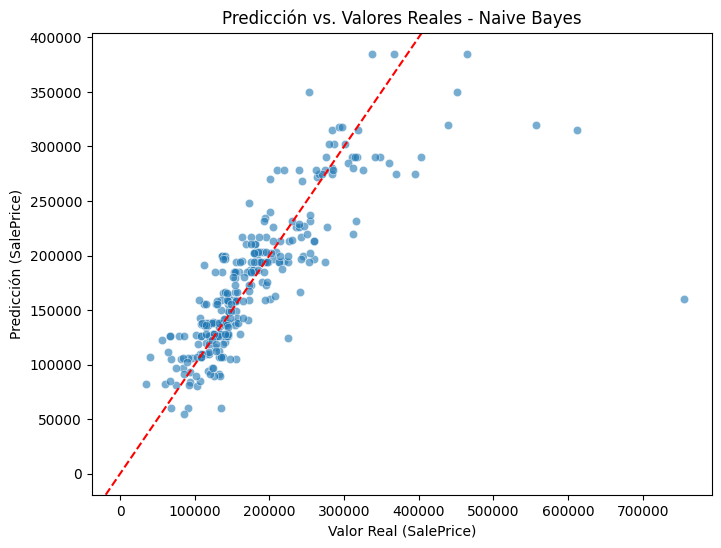

In [3]:
# Inicializar y entrenar el modelo de Naive Bayes (GaussianNB para regresión)
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predicción en conjunto de prueba
y_pred = nb.predict(X_test)

# Evaluación del modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualización de predicciones vs valores reales
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valor Real (SalePrice)")
plt.ylabel("Predicción (SalePrice)")
plt.title("Predicción vs. Valores Reales - Naive Bayes")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')  # Línea de referencia
plt.show()


Interpretación:
- El gráfico muestra la relación entre los valores reales (SalePrice) y los valores predichos por el modelo de Naive Bayes.
- La línea roja representa la predicción ideal (donde el precio real y el predicho son iguales).
- La mayoría de los puntos están cercanos a la línea roja, lo que indica que el modelo sigue una tendencia adecuada.

El modelo funciona bien en el rango medio de precios pero tiene dificultades con los extremos (casas muy baratas o muy caras).

Naive Bayes no es ideal para regresión en este caso, ya que supone que las variables siguen una distribución normal, lo cual puede no ser cierto para los datos de precios.



## Comparación entre modelos

3. Compare los resultados con el modelo de regresión lineal y el árbol de regresión que hizo
en las entregas pasadas. ¿Cuál funcionó mejor?

Naive Bayes:
  RMSE: 53380.67
  R² Score: 0.63

Regresión Lineal:
  RMSE: 39710.99
  R² Score: 0.79

Árbol de Regresión:
  RMSE: 37056.55
  R² Score: 0.82

Random Forest:
  RMSE: 30287.63
  R² Score: 0.88



C:\Users\usuario\AppData\Local\Temp\ipykernel_1152\3451824875.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(rmse_values.keys()), y=list(rmse_values.values()), palette="Blues")


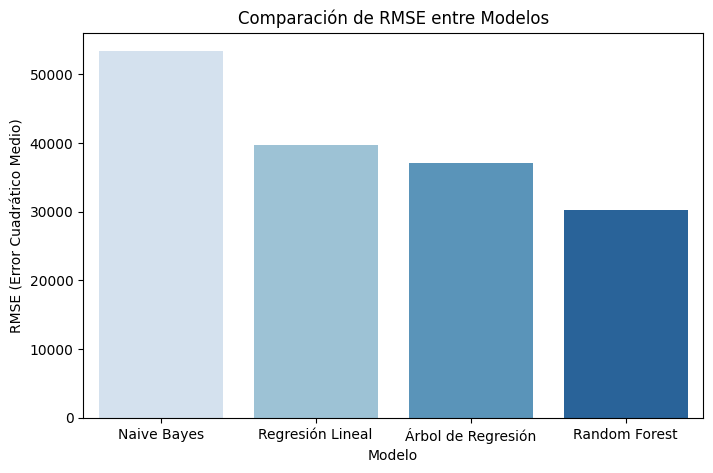

C:\Users\usuario\AppData\Local\Temp\ipykernel_1152\3451824875.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(r2_values.keys()), y=list(r2_values.values()), palette="Greens")


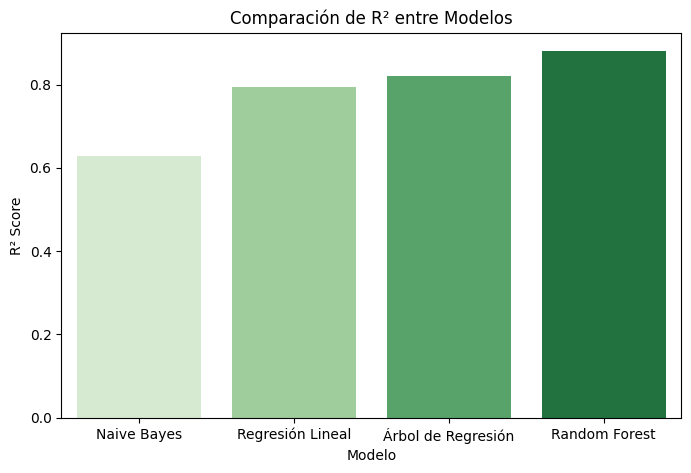

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
df = pd.read_csv("../dataset/train.csv")

# Variables predictoras (mismas usadas en modelos previos)
predictors = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'FullBath']
X = df[predictors]
y = df['SalePrice']

# División en conjunto de entrenamiento y prueba (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Naive Bayes": GaussianNB(),
    "Regresión Lineal": LinearRegression(),
    "Árbol de Regresión": DecisionTreeRegressor(max_depth=6, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
}

rmse_values = {}
r2_values = {}

# Entrenamiento y evaluación de cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_values[name] = rmse
    r2_values[name] = r2

    print(f"{name}:\n  RMSE: {rmse:.2f}\n  R² Score: {r2:.2f}\n")

# Visualización de comparación de RMSE
plt.figure(figsize=(8,5))
sns.barplot(x=list(rmse_values.keys()), y=list(rmse_values.values()), palette="Blues")
plt.xlabel("Modelo")
plt.ylabel("RMSE (Error Cuadrático Medio)")
plt.title("Comparación de RMSE entre Modelos")
plt.show()

# Visualización de comparación de R²
plt.figure(figsize=(8,5))
sns.barplot(x=list(r2_values.keys()), y=list(r2_values.values()), palette="Greens")
plt.xlabel("Modelo")
plt.ylabel("R² Score")
plt.title("Comparación de R² entre Modelos")
plt.show()


Interpretación:
¿Cuál modelo funcionó mejor?

- Random Forest obtuvo el mejor desempeño, con el menor RMSE (30,287) y el mayor R² (0.88), lo que indica que predice con mayor precisión los precios de las casas.
- Árbol de Regresión también fue mejor que Regresión Lineal y Naive Bayes, con un RMSE de 37,056 y R² de 0.82.
- Regresión Lineal tuvo mejor desempeño que Naive Bayes, pero fue superada por los árboles de decisión.
- Naive Bayes es el peor modelo, con el mayor error (RMSE de 53,380) y la peor capacidad predictiva (R² de 0.63), lo que indica que no es adecuado para regresión en este caso.

- Árbol de Regresión y Random Forest funcionan mejor porque manejan relaciones no lineales y capturan mejor la varianza.
- El mejor modelo es Random Forest, ya que tiene la mayor precisión y el menor error. 